# MACHINE LEARNING J COMPONENT 
# **TITLE : Predict Hospital Mortality using Multiparameter Intelligent Monitoring in Intensive Care dataset**
##JOHN MATHEW-20MCB1001                                                          
## HEER MAPARA-20MCB1019
## ROHAN GURUBHAIYE-20MCB1012

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/mimic3c.csv')
data.shape

(58976, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-null  float6

In [ ]:
data.describe()

hadm_id           age  ...  TotalNumInteract   LOSgroupNum
count   58976.000000  58976.000000  ...      58976.000000  58976.000000
mean   149970.809584     53.005884  ...        636.115579      2.360248
std     28883.095213     26.028120  ...        783.938087      1.130337
min    100001.000000      0.000000  ...          0.000000      1.000000
25%    124952.750000     43.000000  ...        267.407500      1.000000
50%    149989.500000     59.000000  ...        497.335000      2.000000
75%    174966.500000     73.000000  ...        811.382500      3.000000
max    199999.000000     89.000000  ...      68600.000000      4.000000

[8 rows x 19 columns]

In [ ]:
data.head(10)

hadm_id gender  age  ...  ExpiredHospital TotalNumInteract LOSgroupNum
0   100001      F   35  ...                0           493.89           2
1   100003      M   59  ...                0           465.71           2
2   100006      F   48  ...                0           344.00           4
3   100007      F   73  ...                0           603.05           2
4   100009      M   60  ...                0           679.84           2
5   100010      F   54  ...                0           509.00           2
6   100011      M   21  ...                0          1482.53           4
7   100012      M   67  ...                0           618.11           3
8   100014      F   49  ...                0            25.39           1
9   100016      M   55  ...                0          1315.92           2

[10 rows x 28 columns]

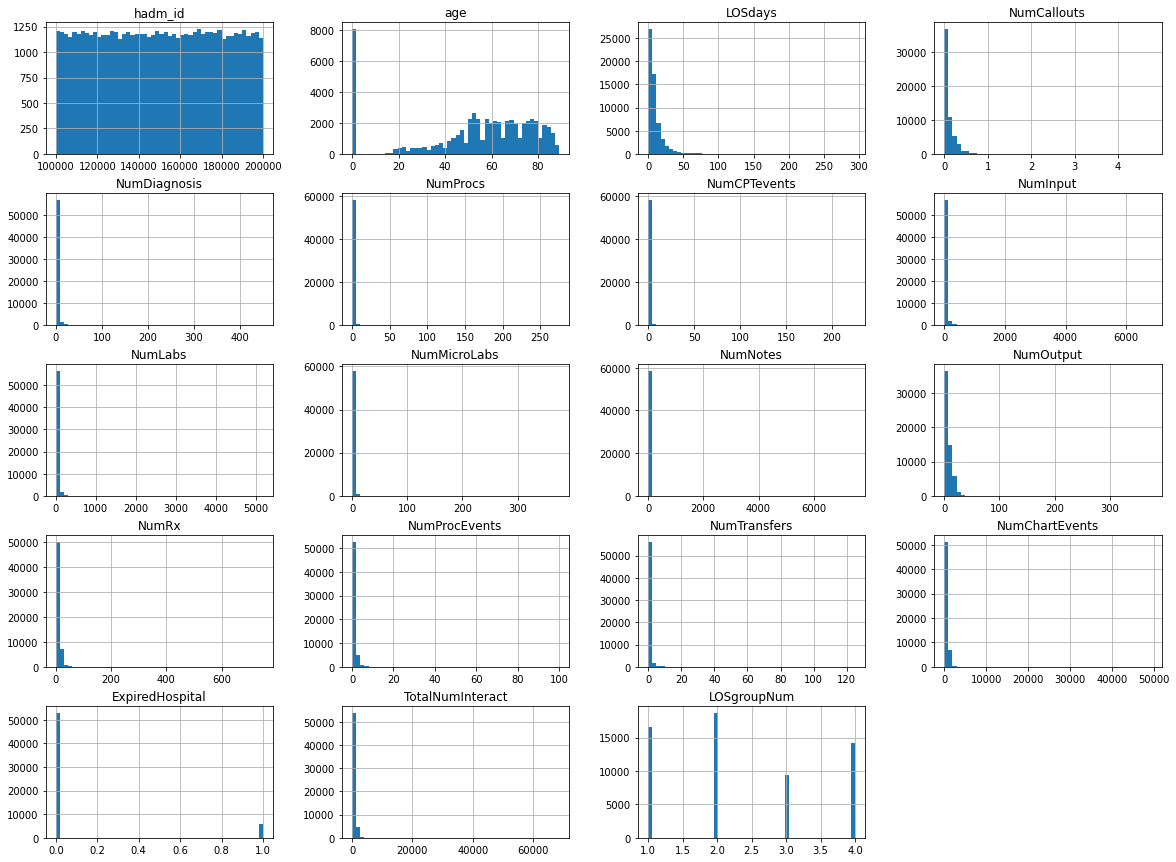

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

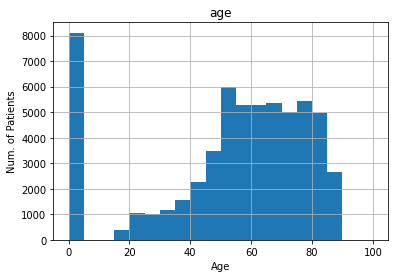

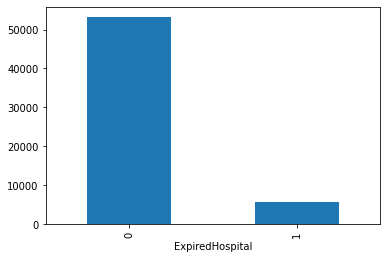

In [ ]:
age_histogram = data.hist(column='age', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Num. of Patients")
plt.show()
data.groupby('ExpiredHospital').size().plot.bar()
plt.show()

In [ ]:
data_copy=data
data_copy.head(10)

hadm_id gender  age  ...  ExpiredHospital TotalNumInteract LOSgroupNum
0   100001      F   35  ...                0           493.89           2
1   100003      M   59  ...                0           465.71           2
2   100006      F   48  ...                0           344.00           4
3   100007      F   73  ...                0           603.05           2
4   100009      M   60  ...                0           679.84           2
5   100010      F   54  ...                0           509.00           2
6   100011      M   21  ...                0          1482.53           4
7   100012      M   67  ...                0           618.11           3
8   100014      F   49  ...                0            25.39           1
9   100016      M   55  ...                0          1315.92           2

[10 rows x 28 columns]

In [ ]:
# Label = ExpiredHospital
y = data_copy['ExpiredHospital']
X = data_copy.drop('ExpiredHospital', 1)

X = X.drop('LOSdays', 1)
X = X.drop('LOSgroupNum', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (58976,)
X - No Label No id  (58976, 19)
Index(['hadm_id', 'gender', 'age', 'admit_type', 'admit_location',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


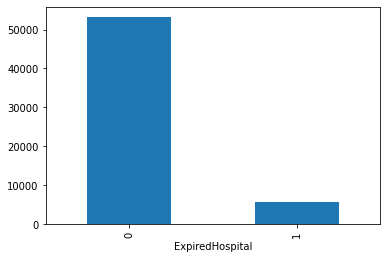

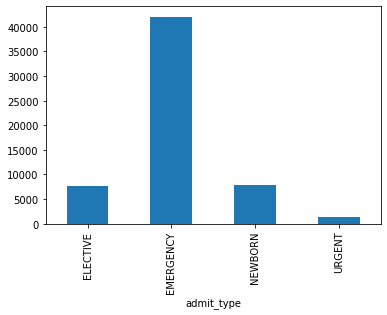

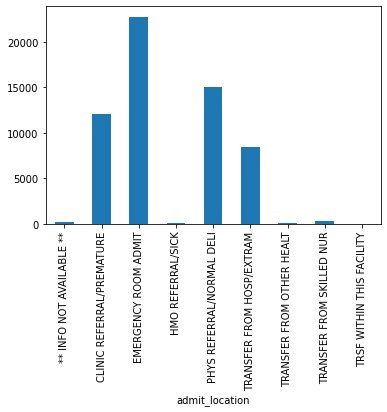

In [ ]:
data_copy.groupby('ExpiredHospital').size().plot.bar()
plt.show()
data_copy.groupby('admit_type').size().plot.bar()
plt.show()
data_copy.groupby('admit_location').size().plot.bar()
plt.show()

In [ ]:
# MAP Text to Numerical Data with one-hot-encoding to convert categorical features to numerical

print(X.shape)
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(58976, 19)
(58976, 31)


In [ ]:
print(X.columns)

Index(['hadm_id', 'age', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents',
       'TotalNumInteract', 'F', 'M', 'ELECTIVE', 'EMERGENCY', 'NEWBORN',
       'URGENT', '** INFO NOT AVAILABLE **', 'CLINIC REFERRAL/PREMATURE',
       'EMERGENCY ROOM ADMIT', 'HMO REFERRAL/SICK',
       'PHYS REFERRAL/NORMAL DELI', 'TRANSFER FROM HOSP/EXTRAM',
       'TRANSFER FROM OTHER HEALT', 'TRANSFER FROM SKILLED NUR',
       'TRSF WITHIN THIS FACILITY'],
      dtype='object')


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
   # plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

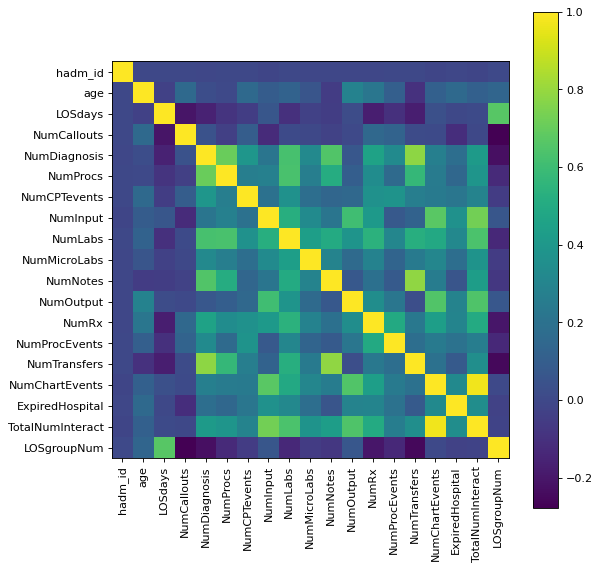

In [ ]:
plotCorrelationMatrix(data_copy, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

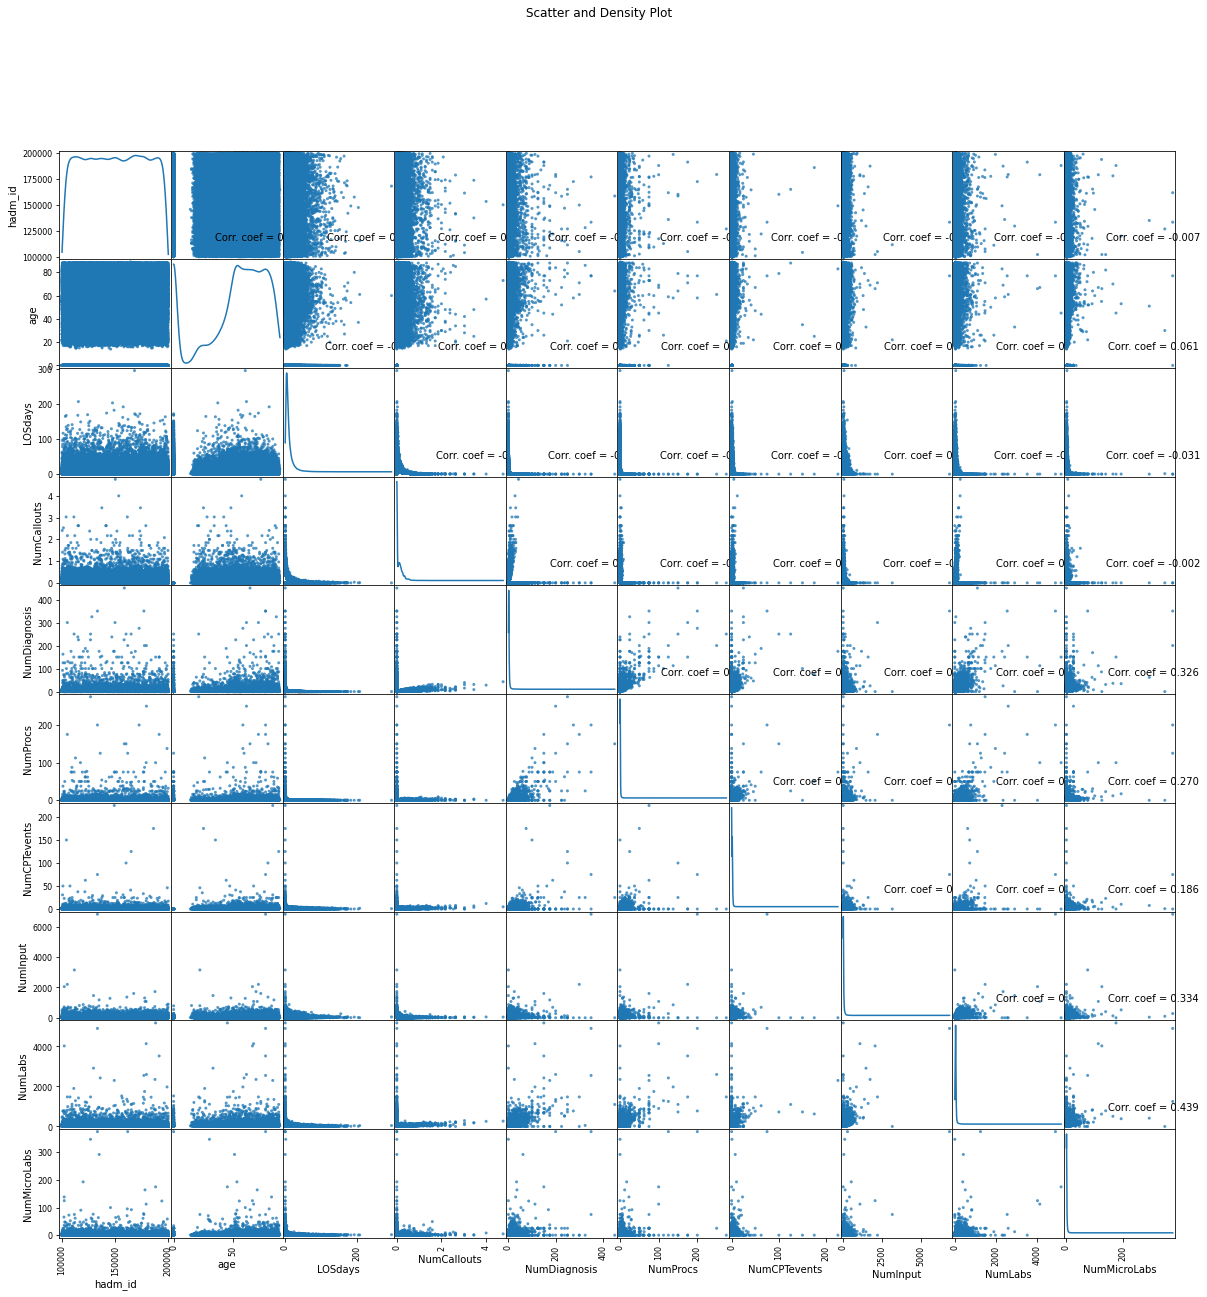

In [ ]:
plotScatterMatrix(data_copy, 20, 10)


In [ ]:
print(data_copy.shape)
print(X.shape)

XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(58976, 28)
(58976, 31)
XnotNorm  (58976, 31)
ynotNorm  (58976,)


In [ ]:
# Normalize X
from sklearn import preprocessing
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
print(XNorm)

        hadm_id       age  ...  TRANSFER FROM SKILLED NUR  TRSF WITHIN THIS FACILITY
0     -1.730086 -0.691792  ...                  -0.068195                  -0.009208
1     -1.730017  0.230296  ...                  -0.068195                  -0.009208
2     -1.729913 -0.192328  ...                  -0.068195                  -0.009208
3     -1.729878  0.768180  ...                  -0.068195                  -0.009208
4     -1.729809  0.268716  ...                  -0.068195                  -0.009208
...         ...       ...  ...                        ...                        ...
58971  1.731899  0.268716  ...                  -0.068195                  -0.009208
58972  1.731934  0.191876  ...                  -0.068195                  -0.009208
58973  1.731969 -1.152835  ...                  -0.068195                  -0.009208
58974  1.732072  0.614499  ...                  -0.068195                  -0.009208
58975  1.732107  1.344485  ...                  -0.068195        

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13112   130]
 [  800   702]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     13242
           1       0.84      0.47      0.60      1502

    accuracy                           0.94     14744
   macro avg       0.89      0.73      0.78     14744
weighted avg       0.93      0.94      0.93     14744

Accuracy: 0.9369234943027672


In [ ]:
# SPLIT into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.25, random_state=0)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (44232, 31)
X_test:  (14744, 31)
y_train:  (44232,)
y_test:  (14744,)


In [ ]:
classifierNorm= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifierNorm.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predNorm = classifierNorm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_predNorm)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_predNorm)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_predNorm)
print("Accuracy:",result2)

Confusion Matrix:
[[13126   116]
 [  833   669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     13242
           1       0.85      0.45      0.59      1502

    accuracy                           0.94     14744
   macro avg       0.90      0.72      0.78     14744
weighted avg       0.93      0.94      0.93     14744

Accuracy: 0.9356348345089528


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[13107,   135],
       [  828,   674]])

#### DECISION TREE CLASSIFICATION ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9012603854631775


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mimic3.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.292897 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.292897 to fit



#### SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9261854970892444


#### Neural Network Model

In [ ]:
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(31,)))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2048)              65536     
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2049      
Total params: 8,460,289
Trainable params: 8,460,289
Non-trainable params: 0
____________________________________________

In [ ]:
NumEpochs = 100
BatchSize = 16

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
2765/2765 [==============================] - 29s 6ms/step - loss: 3.9394 - binary_accuracy: 0.9096 - val_loss: 2.7037 - val_binary_accuracy: 0.9293
Epoch 2/100
2765/2765 [==============================] - 17s 6ms/step - loss: 2.4492 - binary_accuracy: 0.9305 - val_loss: 1.8394 - val_binary_accuracy: 0.9303
Epoch 3/100
2765/2765 [==============================] - 17s 6ms/step - loss: 1.6977 - binary_accuracy: 0.9308 - val_loss: 1.3408 - val_binary_accuracy: 0.9312
Epoch 4/100
2765/2765 [==============================] - 17s 6ms/step - loss: 1.2504 - binary_accuracy: 0.9309 - val_loss: 1.0108 - val_binary_accuracy: 0.9324
Epoch 5/100
2765/2765 [==============================] - 17s 6ms/step - loss: 0.9463 - binary_accuracy: 0.9327 - val_loss: 0.7917 - val_binary_accuracy: 0.9310
Epoch 6/100
2765/2765 [==============================] - 17s 6ms/step - loss: 0.7485 - binary_accuracy: 0.9329 - val_loss: 0.6426 - val_binary_accuracy: 0.9312
Epoch 7/100
2765/2765 [=================

In [ ]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

461/461 [==============================] - 1s 2ms/step - loss: 0.2014 - binary_accuracy: 0.9348
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.2013828009366989, 0.9347531199455261]


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

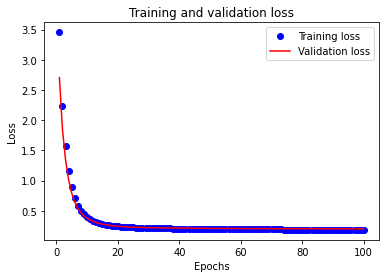

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

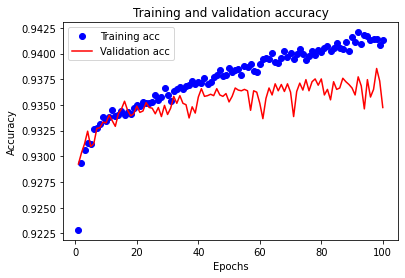

In [ ]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, (len(history_dict['binary_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
final_predictions = model.predict(X_test)
final_predictions.shape

(14744, 1)

In [ ]:
final_predictions

array([[4.3384423e-03],
       [3.8569208e-04],
       [1.3999168e-03],
       ...,
       [2.1303492e-02],
       [1.1303657e-02],
       [9.9509346e-01]], dtype=float32)

In [ ]:
Preds = final_predictions.copy()
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

In [ ]:
conf_mx = confusion_matrix(y_test, Preds)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  12976
FP:  266
FN:  696
TP:  806
0.5366178428761651 0.7518656716417911


In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

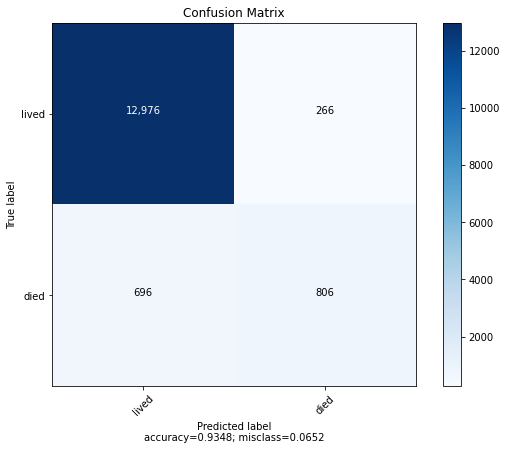

In [ ]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

## INFERENCE 
### RANDOM FOREST CLASSIFICATION :  93.5%
### DECISION TREE CLASSIFICATION :  90.1%
### SUPPORT VECTOR MACHINE(SVM)  :  92.6%
### NEURAL NETWORKS(NN) : 93.4%

####  From above results we can conclude that Random Forest perfomed well on our dataset to predict mortality as compared other algorithms.